This file is for making the volume weighted graphs during the two deglaciations

# Set up file

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import sys
sys.path.insert(0, '/srv/ccrc/data06/z5145948/Deglaciation/modules/')
from keyname import keyname as kn
import config
import itertools
import json

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{wasysym}',
    r'\usepackage{textcomp}']

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
fontsize = 18


# Load Stored Results

In [2]:
# Load the oceanic d13C data
results_dict = json.loads(open("Data/results_dict.json","r").read())

# Load the period definitions
df_periods = pd.DataFrame(config.period_list,columns=['range','name'])

In [3]:
# Load Schneider 2013 d13CO2 (permil) penultimate deglaciation data
df_d13CO2_PD = pd.read_csv('Data/d13Catm_Monte-Carlo-155-105.tab',delimiter='\t')

# Read in Last deglaciation d13CO2 (permil) data from Eggleston 2016
df_d13CO2_LD = pd.read_csv('Data/eggleston16paleo_d13CO2_spline.tab',delimiter='\t')


# Get the Volume Weighted Results from Results Dict PER BASIN

In [4]:
# Start off by only looking at the Atlantic
basin=['Atlantic','Pacific']

# Find all possible combinations of period, location and depth
combinations = pd.DataFrame(list(itertools.product(*[config.period_list,basin]))).rename(
    columns={0:'period',1:'basin'})

# Create a dictionary to store the volume weighted dataframes in
volume_weighted_dfs_dict = {}

# Loop over all the combinations
for period,basin in zip(
    combinations['period'],
    combinations['basin']
    ):
    
    # Get the hashkey
    hashkey_avg_age = kn(basin=basin,period=period[1],vartype='d13C_avg_age')
    
    # Get the dataframe of the relevant results
    df_avg_age = pd.DataFrame.from_dict(results_dict[hashkey_avg_age])
    
    volume_weighted_dfs_dict.update({
        tuple([period[1],basin]) : df_avg_age
    })
    

# Plot the Results

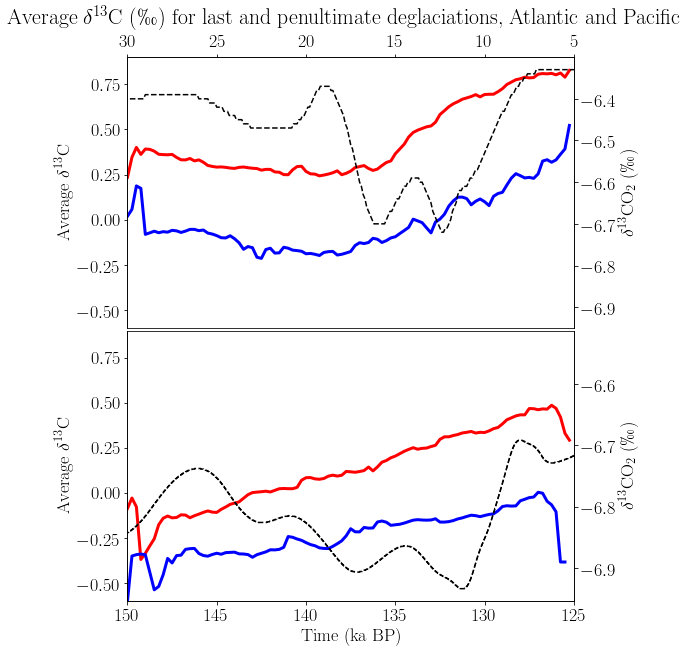

In [5]:

#### Compare the profiles of both the Atlantic and Pacific across the Holocene and the LIG d13C and the mean atmospheric d13CO2

## Defined parameters

linewidth = 3
atl_col = 'r'
pac_col = 'b'

# Set up the figure

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,10))

ax1 = plt.subplot2grid((2,1),(0,0))
ax1b = ax1.twinx()
ax2 = plt.subplot2grid((2,1),(1,0))
ax2b = ax2.twinx()

### Plot mean d13C profiles over time

ax1.plot(volume_weighted_dfs_dict[tuple(['LD','Atlantic'])].age,
         volume_weighted_dfs_dict[tuple(['LD','Atlantic'])].d13C,
         c=atl_col,
         linewidth=linewidth)

ax1.plot(volume_weighted_dfs_dict[tuple(['LD','Pacific'])].age,
         volume_weighted_dfs_dict[tuple(['LD','Pacific'])].d13C,
         c=pac_col,
         linewidth=linewidth)

ax2.plot(volume_weighted_dfs_dict[tuple(['PD','Atlantic'])].age,
         volume_weighted_dfs_dict[tuple(['PD','Atlantic'])].d13C,
         c=atl_col,
         linewidth=linewidth)

ax2.plot(volume_weighted_dfs_dict[tuple(['PD','Pacific'])].age,
         volume_weighted_dfs_dict[tuple(['PD','Pacific'])].d13C,
         c=pac_col,
         linewidth=linewidth)

# Plot the d13CO2 data
ax1b.plot(df_d13CO2_LD['Gas_age'], df_d13CO2_LD['d13CO2'],'k--',zorder=-100)
ax2b.plot(df_d13CO2_PD['Gas_age'], df_d13CO2_PD['d13CO2'],'k--',zorder=-100)

# Set the xlims based on the periods defined
for ax,name in zip([ax1,ax2],['LD','PD']):
    ax.set_xlim(df_periods[df_periods.name==name].range.reset_index(drop=True)[0])

# Adjust the yaxes to be the same
for ax in [ax1,ax2]:
    ax.set_ylim(-0.6, 0.9)

# Set the xaxis ticks to be at the top
ax1.xaxis.tick_top()

# Turn off useless box lines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Define the gap between the two plots
plt.subplots_adjust(hspace=0.01)

# label the axes
ax1.set_ylabel(r'Average $\delta^{13}$C')
ax2.set_ylabel(r'Average $\delta^{13}$C')
ax2.set_xlabel(r'Time (ka BP)')
ax1b.set_ylabel(r'$\delta^{13}$CO$_2$ ($\permil$)')
ax2b.set_ylabel(r'$\delta^{13}$CO$_2$ ($\permil$)')              

ax1

'Last Deglaciation ($\permil$)'
'Penultimate Deglaciation ($\permil$)'

ttl = plt.suptitle('Average $\delta^{13}$C ($\permil$) for last and penultimate deglaciations, Atlantic and Pacific')
ttl.set_position([.5, 0.95])

# Plot the graph

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

plt.savefig('Figures/LIG_Holocene_Atl_Pac_comparison.png')

plt.show()


# Get the Volume Weighted Results from Results Dict PER REGION

In [6]:
# Start off by only looking at the Atlantic
basin=['Atlantic','Pacific']

# Find all possible combinations of period, location and depth
combinations = pd.DataFrame(list(itertools.product(*[config.period_list,basin]))).rename(
    columns={0:'period',1:'basin'})

# Create a dictionary to store the volume weighted dataframes in
volume_weighted_regional_dfs_dict = {}

# Loop over all the combinations
for period,basin in zip(
    combinations['period'],
    combinations['basin']
    ):
    
    # Get the hashkey
    hashkey_avg_age = kn(basin=basin,period=period[1],vartype='d13C_avg_age_region')
    
    # Get the dataframe of the relevant results
    df_avg_age_region = pd.DataFrame.from_dict(results_dict[hashkey_avg_age])
    
    volume_weighted_regional_dfs_dict.update({
        tuple([period[1],basin]) : df_avg_age_region
    })
    

# Plot

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


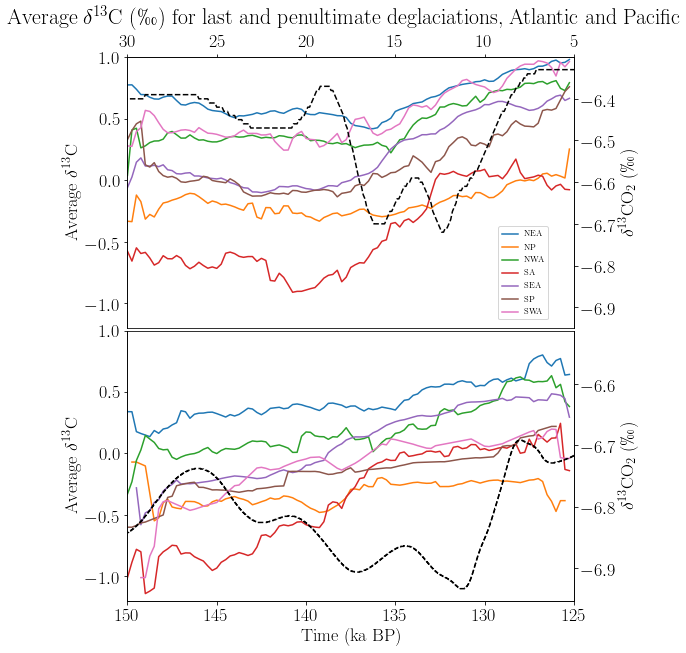

In [7]:

#### Compare the profiles of both the Atlantic and Pacific across the Holocene and the LIG d13C and the mean atmospheric d13CO2

## Defined parameters

linewidth = 3
atl_col = 'r'
pac_col = 'b'

# Set up the figure

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,10))

ax1 = plt.subplot2grid((2,1),(0,0))
ax1b = ax1.twinx()
ax2 = plt.subplot2grid((2,1),(1,0))
ax2b = ax2.twinx()

### Plot mean d13C profiles over time

df_averaged_age_region = pd.concat(volume_weighted_regional_dfs_dict).reset_index().rename(columns={'level_0':'period','level_1':'basin'}).drop('level_2',axis=1)

region_list = []
output_list = []

for region in np.unique(df_averaged_age_region.regions):
    df = df_averaged_age_region[(df_averaged_age_region.period=='LD')&(df_averaged_age_region.regions==region)]

    ax1.plot(df.age,
             df.d13C)
    
    df = df_averaged_age_region[(df_averaged_age_region.period=='PD')&(df_averaged_age_region.regions==region)]

    output, = ax2.plot(df.age,
                      df.d13C,
                      label=region)    
    
    region_list.append(region)
    output_list.append(output)

# Plot the d13CO2 data
ax1b.plot(df_d13CO2_LD['Gas_age'], df_d13CO2_LD['d13CO2'],'k--',zorder=-100)
ax2b.plot(df_d13CO2_PD['Gas_age'], df_d13CO2_PD['d13CO2'],'k--',zorder=-100)

# Set the xlims based on the periods defined
for ax,name in zip([ax1,ax2],['LD','PD']):
    ax.set_xlim(df_periods[df_periods.name==name].range.reset_index(drop=True)[0])

# Adjust the yaxes to be the same
for ax in [ax1,ax2]:
    ax.set_ylim(-1.2, 1.0)

# Set the xaxis ticks to be at the top
ax1.xaxis.tick_top()

# Turn off useless box lines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Define the gap between the two plots
plt.subplots_adjust(hspace=0.01)

# label the axes
ax1.set_ylabel(r'Average $\delta^{13}$C')
ax2.set_ylabel(r'Average $\delta^{13}$C')
ax2.set_xlabel(r'Time (ka BP)')
ax1b.set_ylabel(r'$\delta^{13}$CO$_2$ ($\permil$)')
ax2b.set_ylabel(r'$\delta^{13}$CO$_2$ ($\permil$)')              


'Last Deglaciation ($\permil$)'
'Penultimate Deglaciation ($\permil$)'

ttl = plt.suptitle('Average $\delta^{13}$C ($\permil$) for last and penultimate deglaciations, Atlantic and Pacific')
ttl.set_position([.5, 0.95])

# Create a legend
plt.legend(handles=output_list, bbox_to_anchor=(0.95, 1.4), fontsize=8)

# Plot the graph

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

plt.savefig('Figures/LIG_Holocene_Atl_Pac_comparison.png')

plt.show()


In [62]:
# Get the mean basin dataframe
df_mean_atl = volume_weighted_dfs_dict[tuple(['PD','Atlantic'])]

# Get the specific region dataframe
df = df_averaged_age_region[(df_averaged_age_region.period=='LD')&(df_averaged_age_region.regions==region)]

# Rename one of the d13C so that it's clear which is which
df = df[['age','d13C']].rename(columns={'d13C':'d13C_regional'})

# Make age the index of both dataframes so that they can be concatenated
df = df.set_index('age')
df_mean_atl = df_mean_atl.set_index('age')

# Concat the two dataframes together
df.merge(df_mean_atl,on='index')

KeyError: 'index'

In [57]:
df

,d13C_regional,d13C,stdev
age,,,
5.25,0.965667,NaN,NaN
5.50,0.923000,NaN,NaN
5.75,0.959375,NaN,NaN
6.00,0.848250,NaN,NaN
6.25,0.917063,NaN,NaN
...,...,...,...
149.00,NaN,-0.335886,0.286547
149.25,NaN,-0.369876,0.239994
149.50,NaN,-0.077924,0.082138


In [46]:
df

,d13C_regional,d13C,stdev
age,,,
5.25,0.965667,NaN,NaN
5.50,0.923000,NaN,NaN
5.75,0.959375,NaN,NaN
6.00,0.848250,NaN,NaN
6.25,0.917063,NaN,NaN
...,...,...,...
149.00,NaN,-0.335886,0.286547
149.25,NaN,-0.369876,0.239994
149.50,NaN,-0.077924,0.082138


,test
age,
125.25,-0.040000
125.50,-0.040000
125.75,-0.034615
126.00,0.195385
126.25,0.198077
...,...
148.25,-0.449722
148.50,-0.755000
148.75,-0.835000


In [25]:
len(df_mean_atl)

100

In [29]:
set(df.age).symmetric_difference(set(df_mean_atl.age))

{149.5, 149.75, 150.0}